In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("classified_data_2.txt")

In [3]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
X = data.drop("TARGET CLASS", axis=1)
y = data["TARGET CLASS"]

In [7]:
scaler = StandardScaler()
scaler.fit(X=X)
scaled_features = scaler.transform(X=X)
df_feat = pd.DataFrame(data=scaled_features, columns=X.columns)

In [8]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, train_size=0.3, random_state=101)

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X=X_train, y=y_train)
predictions = knn.predict(X=X_test)
print(confusion_matrix(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions))

[[248 106]
 [101 245]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       354
           1       0.70      0.71      0.70       346

    accuracy                           0.70       700
   macro avg       0.70      0.70      0.70       700
weighted avg       0.70      0.70      0.70       700



In [13]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X=X_train, y=y_train)
    predictions = knn.predict(X=X_test)
    error_rate.append(np.mean(predictions != y_test))

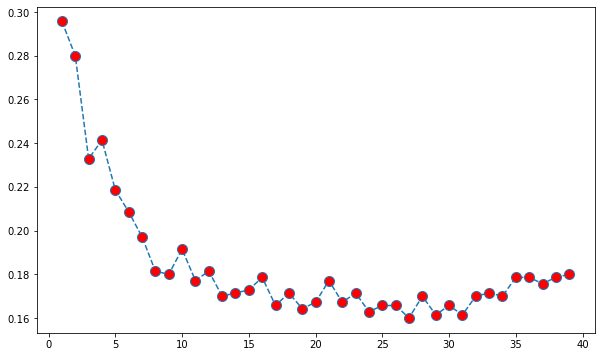

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, linestyle="--", marker="o", markerfacecolor="red", markersize=10)

In [20]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X=X_train, y=y_train)
predictions = knn.predict(X=X_test)
print(confusion_matrix(y_true=y_test, y_pred=predictions))
print(classification_report(y_true=y_test, y_pred=predictions))

[[295  59]
 [ 61 285]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       354
           1       0.83      0.82      0.83       346

    accuracy                           0.83       700
   macro avg       0.83      0.83      0.83       700
weighted avg       0.83      0.83      0.83       700

